In [1]:
#Libraries for the experiments 
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #(matplotblib)
import seaborn as sns #(visualsize)

# pandas to handle the data matplotlib and  seaborn for visualization

In [2]:
data=pd.read_csv("Tweets.csv")
data[:3]

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

# Pre-processing

In [30]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    filtered_words1 = [w for w in filtered_words if len(w) > 2 if not w=="amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words1]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)


data['cleanText']=data['text'].map(lambda s:preprocess(s)) 

# visualisation of dataset

### display the frequency of most used words  in tweets

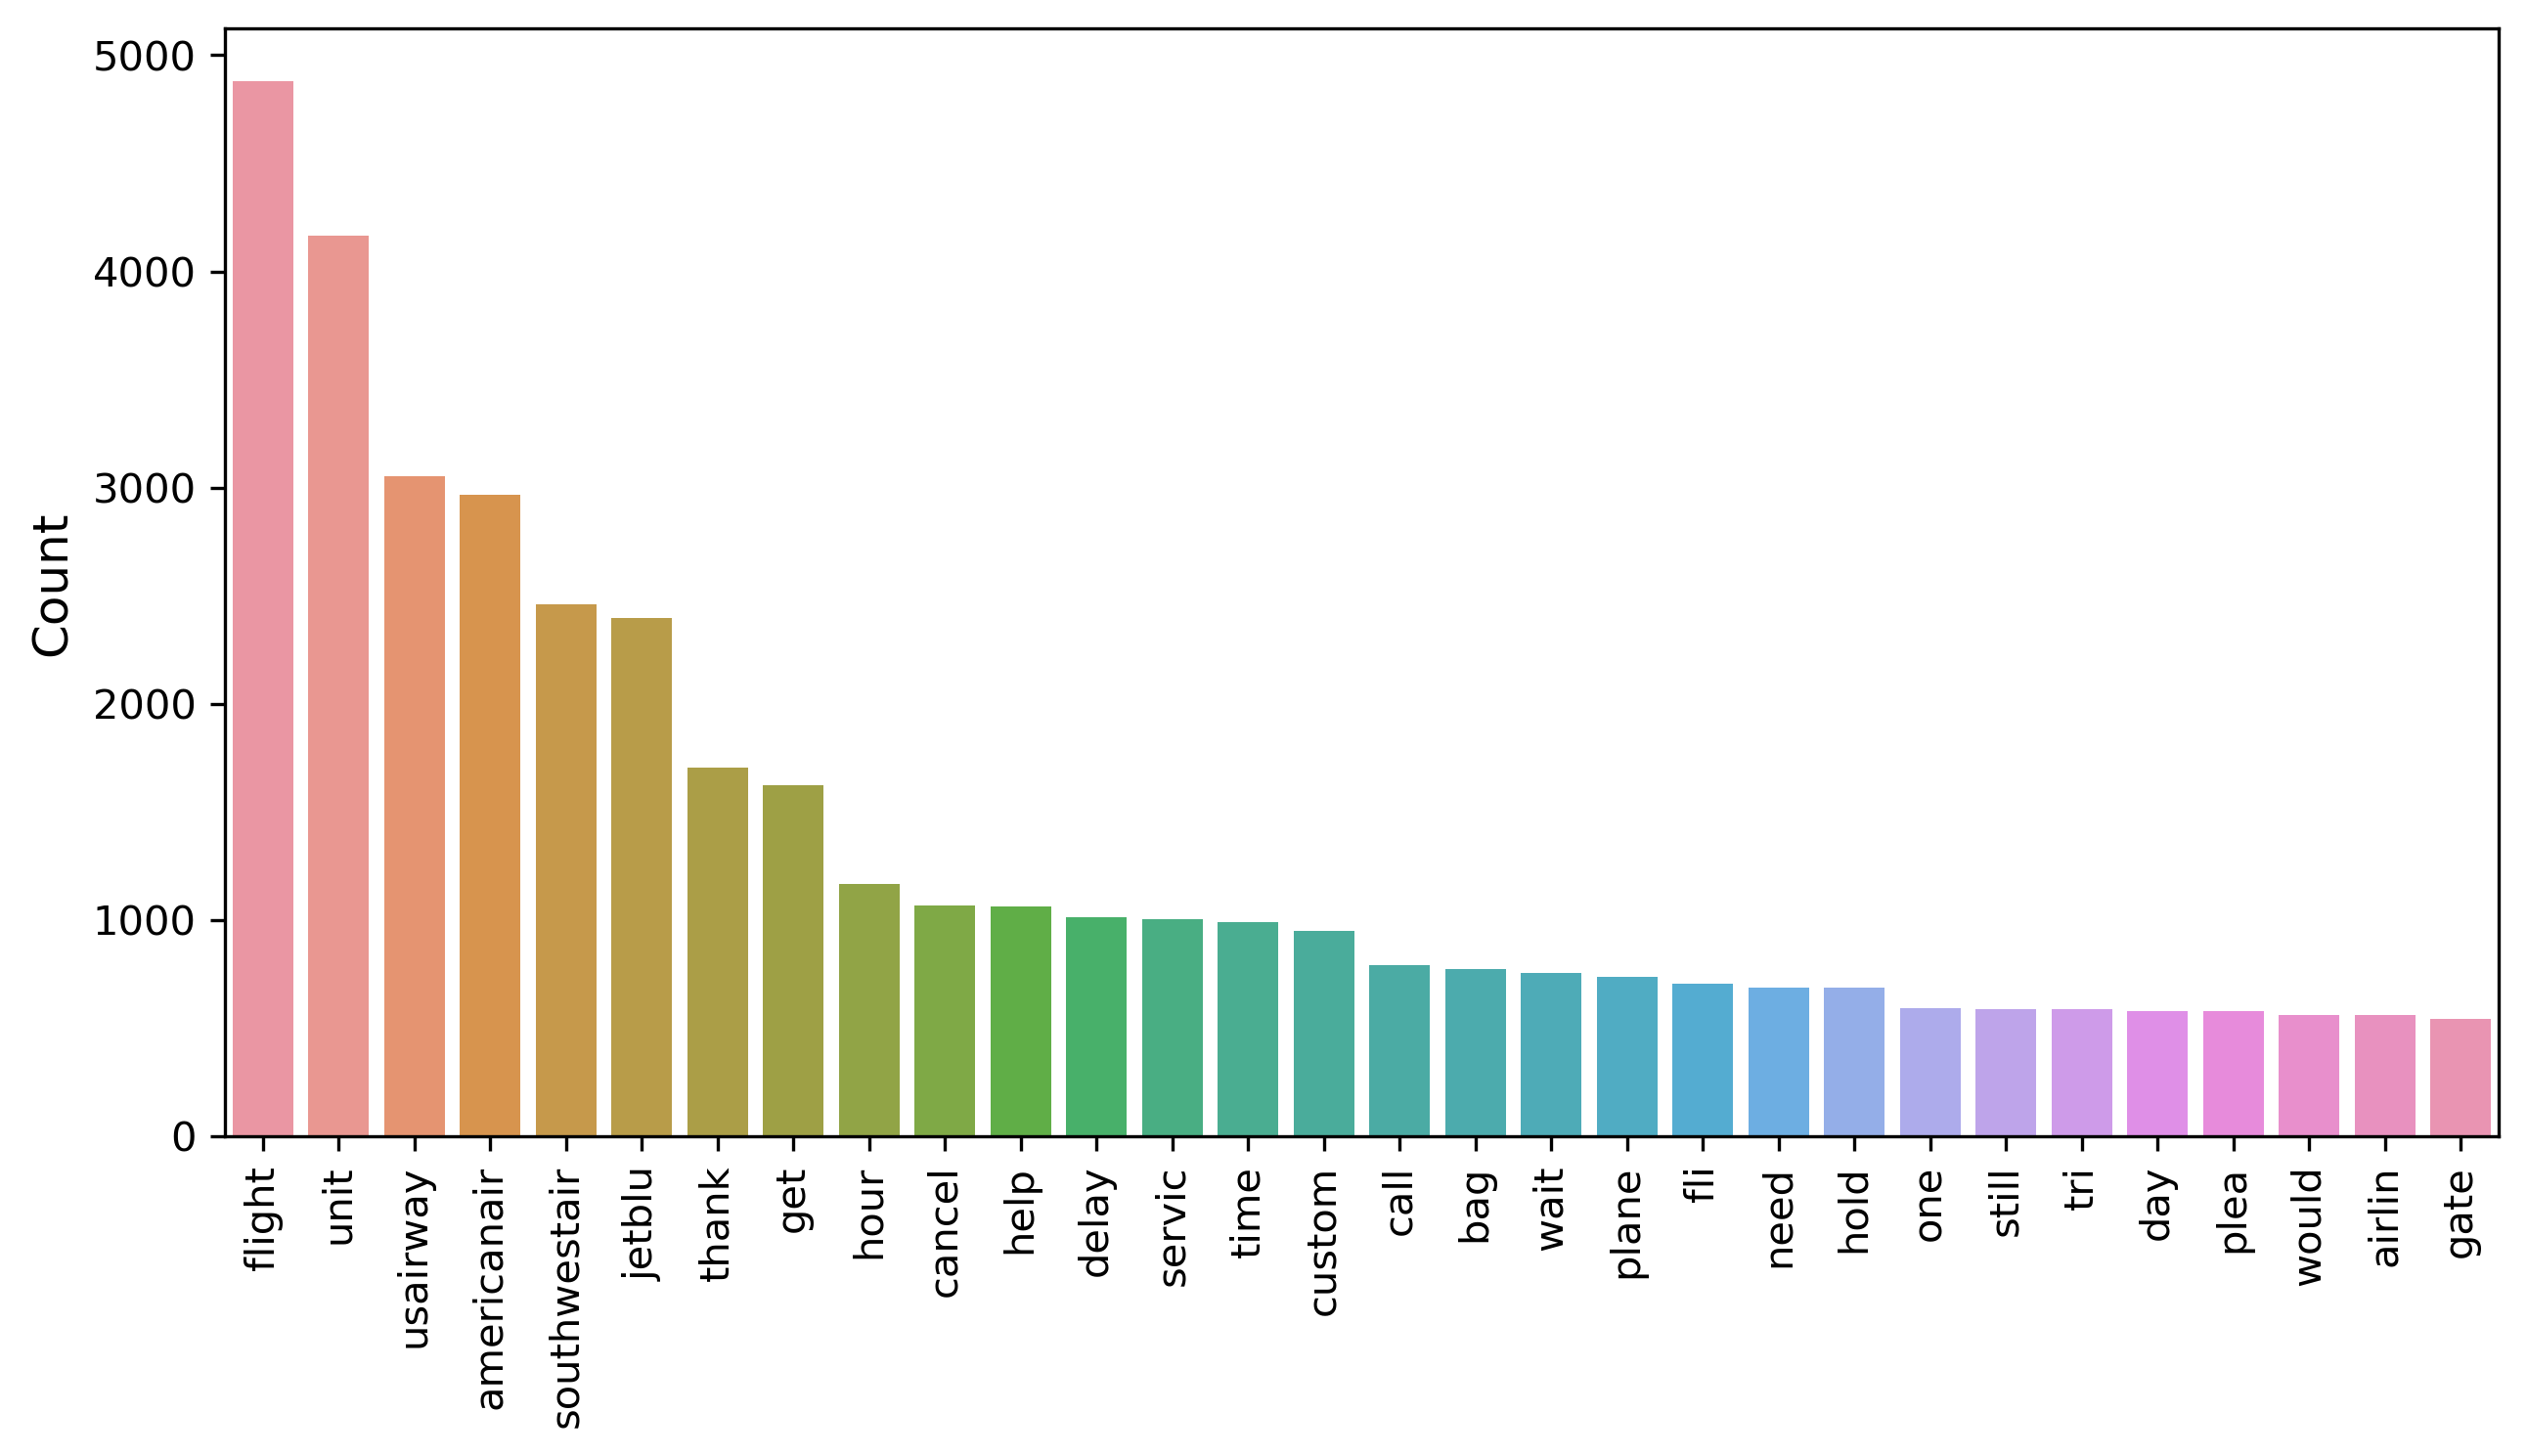

In [31]:


words = []
for i in range(0,len(data["cleanText"])):
    words = words + (re.findall(r'\w+', data["cleanText"][i]))# words cantain all the words in the dataset   

from collections import Counter
words_counts = Counter(words)

most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,5),dpi=300)
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Count',fontsize=12)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], rotation=90)
#plt.title('Most Domain use to write paper.')
plt.show()

### wordcloud for tweets dataset

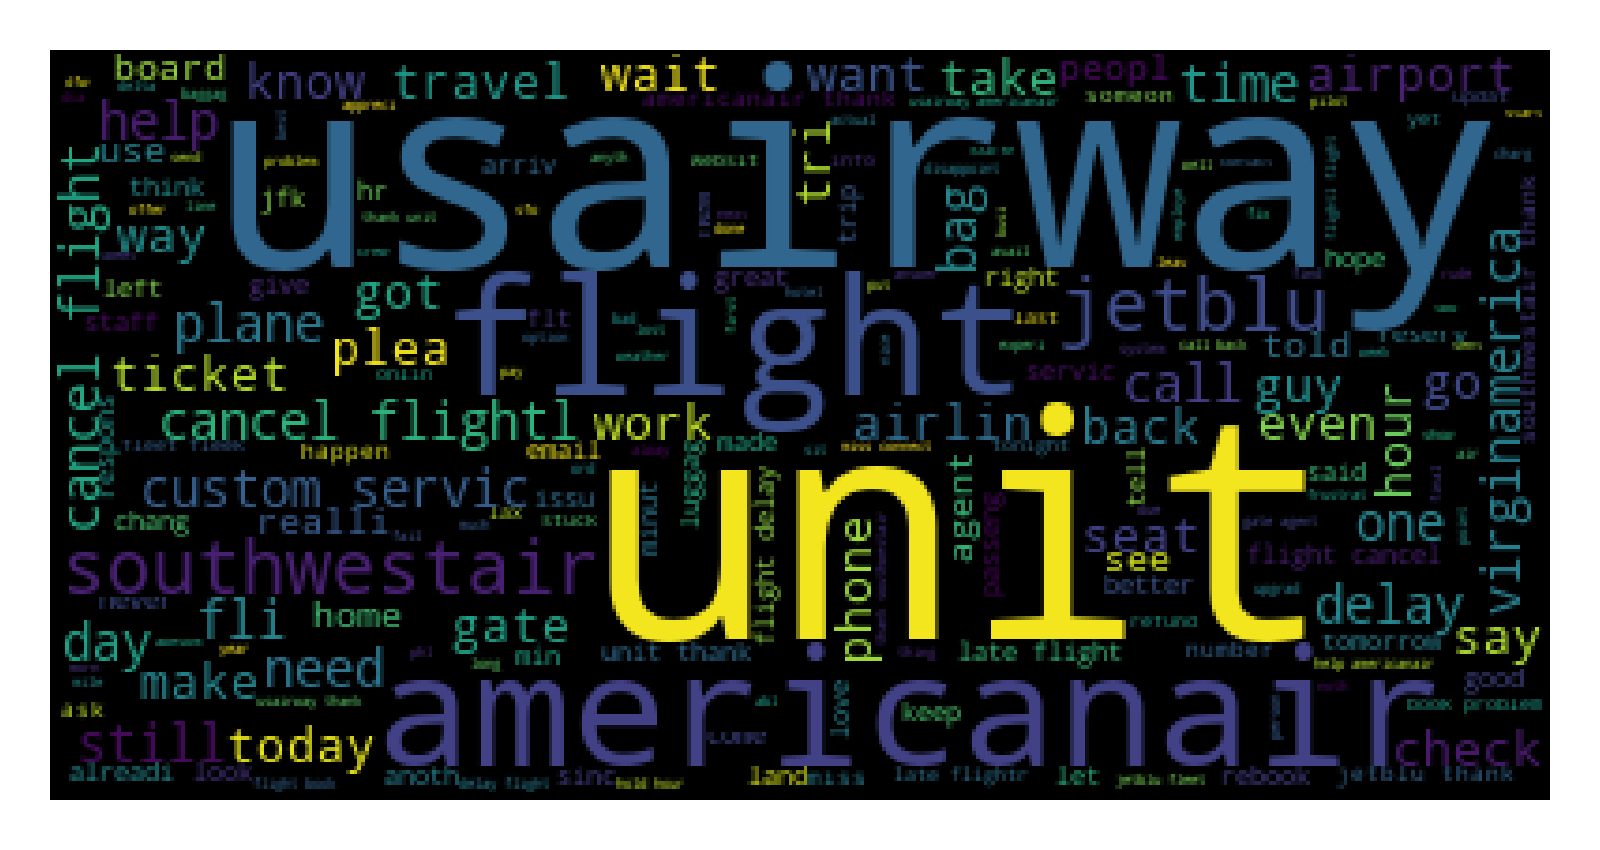

In [32]:
#wordcloud to see to most useable word to analyze the topics in tweets text
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud().generate(' '.join(data['cleanText']))
  
# plot the WordCloud image                        
plt.figure(figsize = (3, 3), facecolor = None, dpi=500) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### number of sentiment in dataset

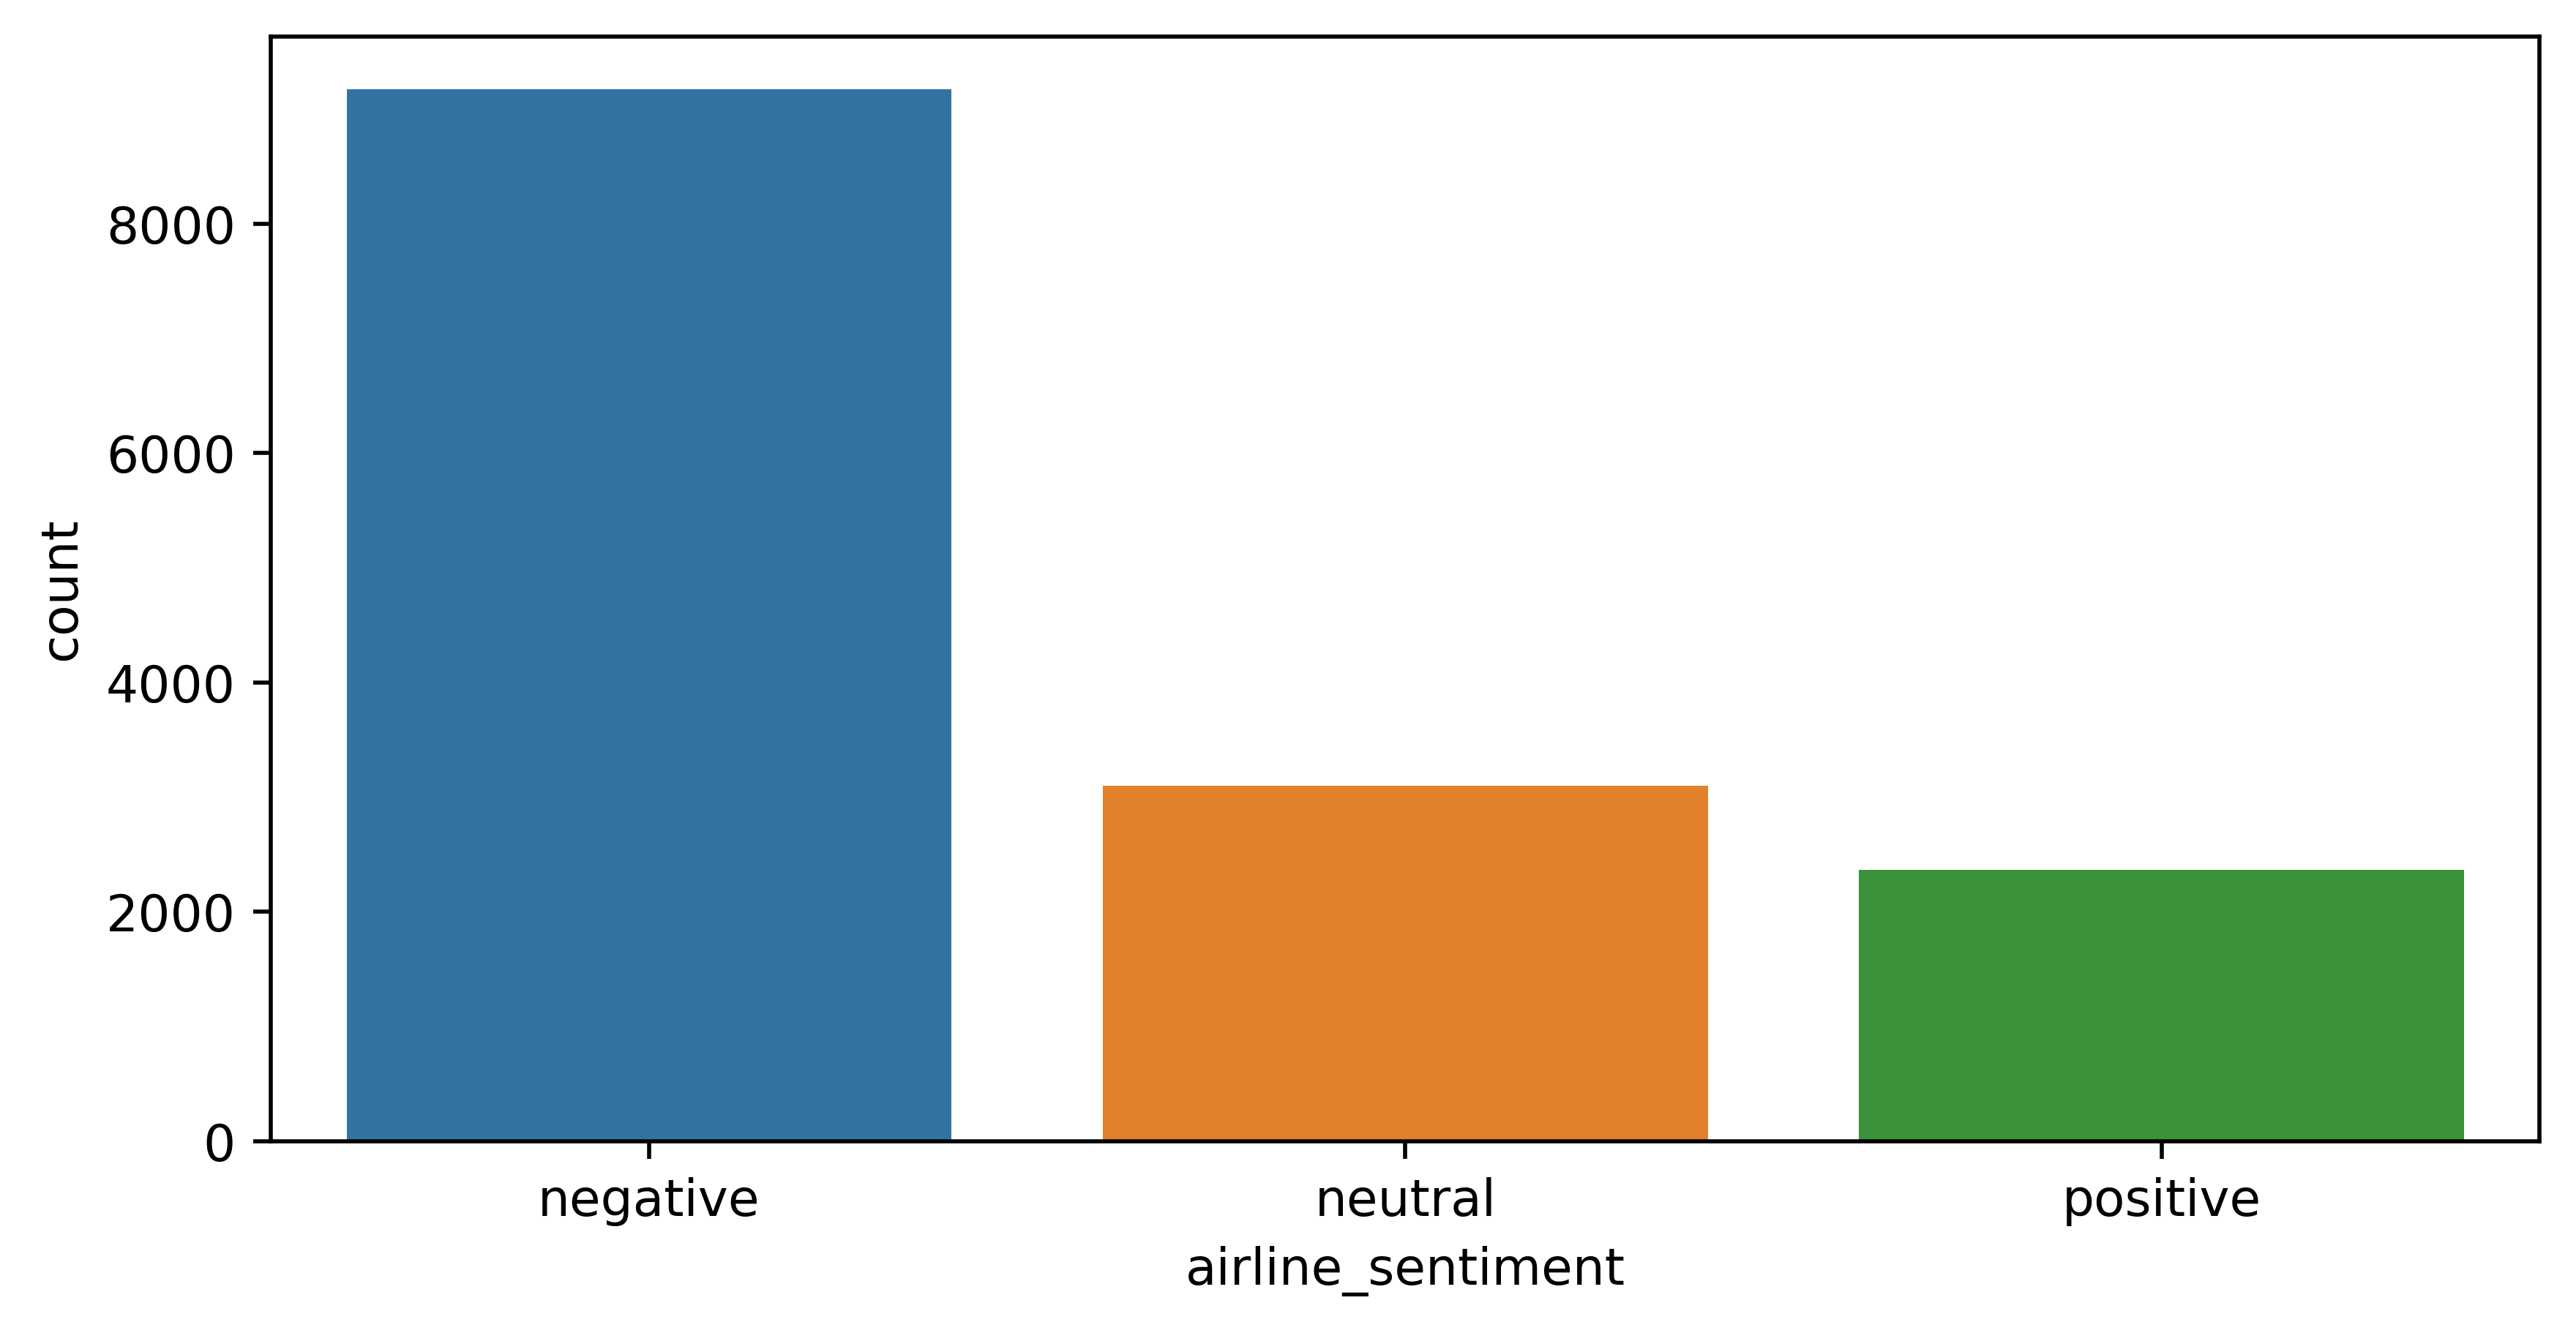

In [5]:
from matplotlib import pyplot
y = data["airline_sentiment"]         
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=data["airline_sentiment"].value_counts().iloc[:15].index )   
plt.savefig('fig3.png')

# Start Machine Learning 

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data splitting

In [34]:
data["cleanText"]=data["cleanText"].astype(str)

In [35]:
#Data Splitting into training and testing sets for machine leanring models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["cleanText"],data['airline_sentiment'],test_size=0.25,shuffle=True)

In [36]:
#TF-IDF features 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_train)
y = vectorizer.transform(X_test)

In [37]:
#BoW features 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X1 = vectorizer.fit_transform(X_train)
y1 = vectorizer.transform(X_test)

# TF-IDF Results using several machine learning models

# Decision Tree Classifier



In [38]:
#Decsion tree machine leanirng models
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=50)
dtPre=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtPre))
print(classification_report(y_test,dtPre))
print(confusion_matrix(y_test,dtPre))

0.6871584699453552
              precision    recall  f1-score   support

    negative       0.76      0.84      0.80      2303
     neutral       0.46      0.37      0.41       777
    positive       0.60      0.52      0.56       580

    accuracy                           0.69      3660
   macro avg       0.61      0.58      0.59      3660
weighted avg       0.67      0.69      0.68      3660

[[1925  247  131]
 [ 423  287   67]
 [ 186   91  303]]


# Random Forest Classifier



In [16]:
#Random forest machine leanring models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=300) 
rfc.fit(X, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7505464480874317
              precision    recall  f1-score   support

    negative       0.77      0.93      0.85      2262
     neutral       0.62      0.40      0.48       803
    positive       0.77      0.54      0.63       595

    accuracy                           0.75      3660
   macro avg       0.72      0.62      0.65      3660
weighted avg       0.74      0.75      0.73      3660

[[2107  122   33]
 [ 419  321   63]
 [ 198   78  319]]


# Support vector machine (SVM)



In [18]:
#support vector machine for machine leanring
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y_train)
y_pred_class = svm.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

SVC
0.7841530054644809
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      2262
     neutral       0.66      0.50      0.57       803
    positive       0.80      0.65      0.71       595

    accuracy                           0.78      3660
   macro avg       0.76      0.69      0.72      3660
weighted avg       0.78      0.78      0.77      3660

[[2082  141   39]
 [ 340  403   60]
 [ 145   65  385]]


# Logistic Regression



In [20]:
#Logistic regression for machine leanring
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="sag",multi_class="ovr",C=1.0)
Lr.fit(X, y_train)
y_pred_class = Lr.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7781420765027323
              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      2262
     neutral       0.69      0.42      0.53       803
    positive       0.83      0.62      0.71       595

    accuracy                           0.78      3660
   macro avg       0.77      0.66      0.70      3660
weighted avg       0.77      0.78      0.76      3660

[[2140   98   24]
 [ 413  340   50]
 [ 175   52  368]]


# BoW Results using several machine learning models

# Decision Tree Classifier

In [15]:
#Decsion tree machine leanirng models
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=50)
dtPre=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtPre))
print(classification_report(y_test,dtPre))
print(confusion_matrix(y_test,dtPre))

0.6934426229508197
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80      2262
     neutral       0.46      0.44      0.45       803
    positive       0.65      0.54      0.59       595

    accuracy                           0.69      3660
   macro avg       0.63      0.60      0.61      3660
weighted avg       0.69      0.69      0.69      3660

[[1865  302   95]
 [ 377  350   76]
 [ 155  117  323]]


# Random Forest Classifier

In [17]:
#Random forest machine leanring models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=300) 
rfc.fit(X1, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7538251366120219
              precision    recall  f1-score   support

    negative       0.80      0.89      0.85      2262
     neutral       0.59      0.49      0.53       803
    positive       0.72      0.58      0.64       595

    accuracy                           0.75      3660
   macro avg       0.70      0.65      0.67      3660
weighted avg       0.74      0.75      0.74      3660

[[2023  184   55]
 [ 335  390   78]
 [ 159   90  346]]


# Support vector machine (SVM)

In [19]:
#support vector machine for machine leanring
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=1.0)
svm.fit(X1, y_train)
y_pred_class = svm.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

SVC
0.7685792349726775
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      2262
     neutral       0.58      0.54      0.56       803
    positive       0.73      0.70      0.72       595

    accuracy                           0.77      3660
   macro avg       0.72      0.70      0.71      3660
weighted avg       0.76      0.77      0.77      3660

[[1959  233   70]
 [ 283  437   83]
 [  99   79  417]]


# Logistic Regression

In [21]:
#Logistic regression for machine leanring
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="sag",multi_class="ovr",C=1.0)
Lr.fit(X1, y_train)
y_pred_class = Lr.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7841530054644809
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      2262
     neutral       0.63      0.53      0.57       803
    positive       0.77      0.69      0.73       595

    accuracy                           0.78      3660
   macro avg       0.74      0.71      0.72      3660
weighted avg       0.78      0.78      0.78      3660

[[2035  179   48]
 [ 302  424   77]
 [ 115   69  411]]


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Deep learning model LSTM results

In [ ]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [24]:
from keras import optimizers
import tensorflow.keras
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(data["cleanText"].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(data["cleanText"].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=X.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100))
model_conv.add(Dense(3, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
#Y = data.Reviewer_Score
Y = pd.get_dummies(data['airline_sentiment']).values

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.25, random_state =2)
batch_size=128
#Here we train the Network.

pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred

Epoch 1/100


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\keras\engine\base_layer.py:1307: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


86/86 - 18s - loss: 0.8055 - accuracy: 0.6582 - mae: 0.3178 - mse: 0.1555 - precision: 0.6176 - recall: 0.6244 - f1_score: 0.6115 - val_loss: 0.6728 - val_accuracy: 0.7342 - val_mae: 0.2830 - val_mse: 0.1277 - val_precision: 0.7552 - val_recall: 0.8126 - val_f1_score: 0.7828
Epoch 2/100
86/86 - 2s - loss: 0.5614 - accuracy: 0.7740 - mae: 0.2226 - mse: 0.1070 - precision: 0.7914 - recall: 0.8323 - f1_score: 0.8113 - val_loss: 0.5634 - val_accuracy: 0.7626 - val_mae: 0.2195 - val_mse: 0.1077 - val_precision: 0.8131 - val_recall: 0.8436 - val_f1_score: 0.8281
Epoch 3/100
86/86 - 2s - loss: 0.4503 - accuracy: 0.8225 - mae: 0.1769 - mse: 0.0854 - precision: 0.8286 - recall: 0.8523 - f1_score: 0.8403 - val_loss: 0.5480 - val_accuracy: 0.7768 - val_mae: 0.1950 - val_mse: 0.1040 - val_precision: 0.8370 - val_recall: 0.8607 - val_f1_score: 0.8487
Epoch 4/100
86/86 - 2s - loss: 0.3882 - accuracy: 0.8482 - mae: 0.1523 - mse: 0.0733 - precision: 0.8442 - recall: 0.8687 - f1_score: 0.8563 - val_los

In [25]:
rounded_predictions = model_conv.predict_classes(X_valid, batch_size=128, verbose=0)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2254
           1       0.55      0.53      0.54       798
           2       0.70      0.62      0.66       608

    accuracy                           0.75      3660
   macro avg       0.69      0.67      0.68      3660
weighted avg       0.74      0.75      0.74      3660

[[1932  239   83]
 [ 300  424   74]
 [ 131  103  374]]
